<a href="https://colab.research.google.com/github/pradeepmore3252/End-To_End-ML-Projects/blob/main/Chronic_Kidney_Disease/CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Data Set Information:

We use the following representation to collect the dataset
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
class - class

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CKD/kidney_disease.csv')

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.shape

(400, 26)

In [8]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Replacing Missing Values -For numerical Data Use Mean or Median -For catorical data use mode

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df_imputer = pd.DataFrame(mode.fit_transform(df))
df_imputer.columns = df.columns
df_imputer

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [14]:
df_imputer.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

-Finding unique values in the columns

In [15]:
df_imputer.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [16]:
set(df_imputer['age'].tolist())

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 90.0}

In [17]:
for i in df_imputer.columns:
    print("**********************", i, "**********************")
    print()
    print(set(df_imputer[i].tolist()))
    print()

********************** id **********************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

In [18]:
print(df_imputer['rc'].mode())
print(df_imputer['wc'].mode())
print(df_imputer['pcv'].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [19]:
df_imputer['classification'] = df_imputer['classification'].apply(lambda x:'ckd' if x == 'ckd\t' else x)

df_imputer['cad'] = df_imputer['cad'].apply(lambda x:'no' if x == '\tno' else x)

df_imputer['dm'] = df_imputer['dm'].apply(lambda x:'no' if x == '\tno' else x)
df_imputer['dm'] = df_imputer['dm'].apply(lambda x:'yes' if x == '\tyes' else x)
df_imputer['dm'] = df_imputer['dm'].apply(lambda x:'yes' if x == 'yes' else x)

df_imputer['rc'] = df_imputer['rc'].apply(lambda x:'5.2' if x == '\t?' else x)

df_imputer['wc'] = df_imputer['wc'].apply(lambda x:'9800' if x == '\t6200' else x)
df_imputer['wc'] = df_imputer['wc'].apply(lambda x:'9800' if x == '\t8400' else x)
df_imputer['wc'] = df_imputer['wc'].apply(lambda x:'9800' if x == '\t?' else x)

df_imputer['pcv'] = df_imputer['pcv'].apply(lambda x:'41' if x == '\t43' else x)
df_imputer['pcv'] = df_imputer['pcv'].apply(lambda x:'41' if x == '\t?' else x)

In [20]:
df_imputer

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [21]:
for i in df_imputer.columns:
    print("**********************", i, "**********************")
    print()
    print(set(df_imputer[i].tolist()))
    print()

********************** id **********************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

In [22]:
df_imputer['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Axes(0.125,0.11;0.775x0.77)


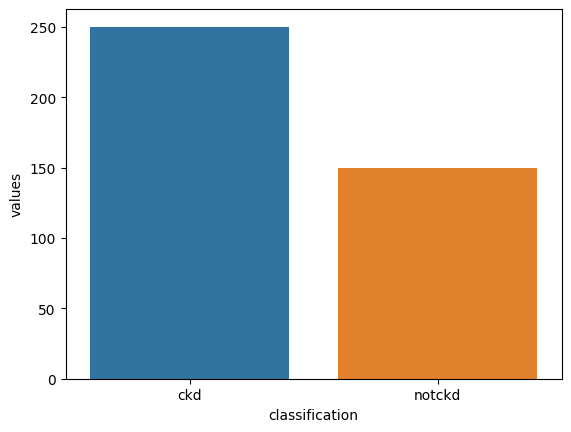

In [23]:
temp = df_imputer['classification'].value_counts()
temp_df = pd.DataFrame({'classification':temp.index, 'values':temp.values})
print(sns.barplot(x = 'classification', y = 'values', data = temp_df))
#Imbalanced Data

In [24]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [25]:
df_imputer.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [26]:
df.select_dtypes(exclude = ['object']).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [27]:
for i in df.select_dtypes(exclude = ['object']).columns:
    df_imputer[i] = df_imputer[i].apply(lambda x: float(x))

In [28]:
df_imputer.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

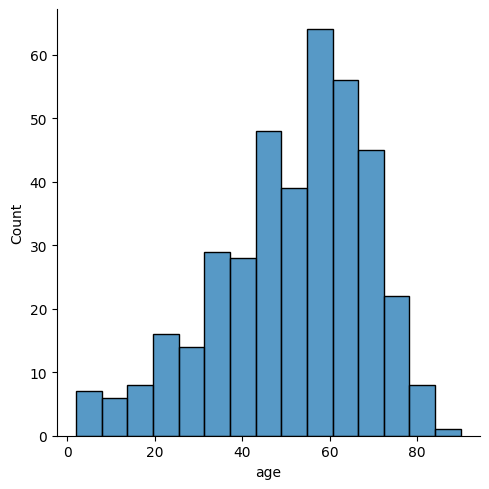

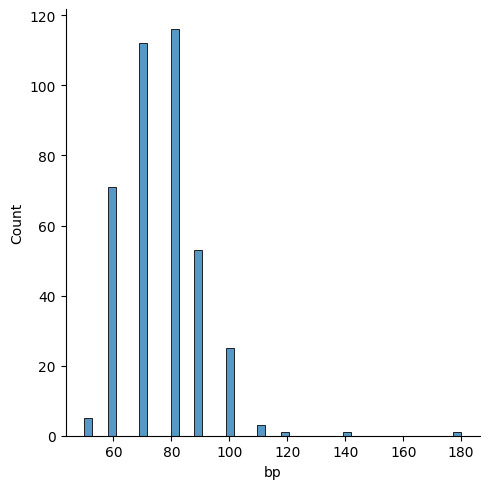

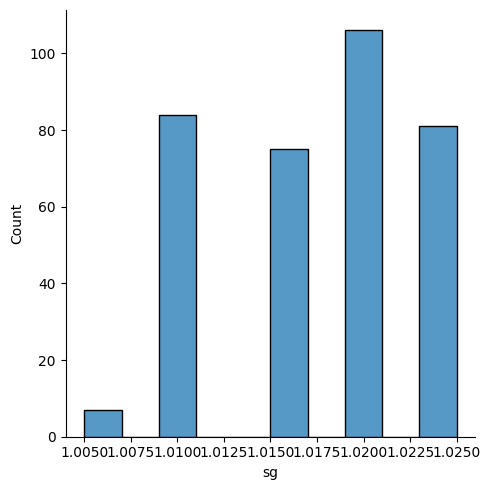

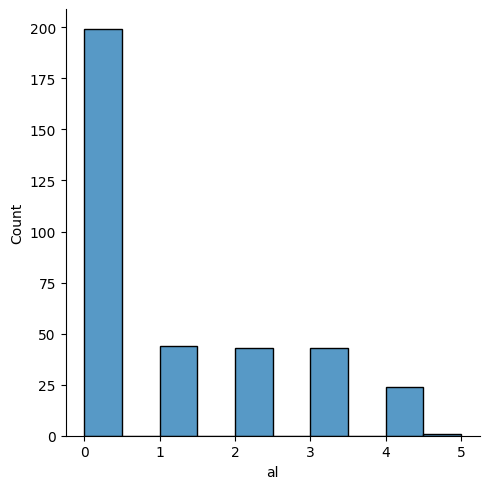

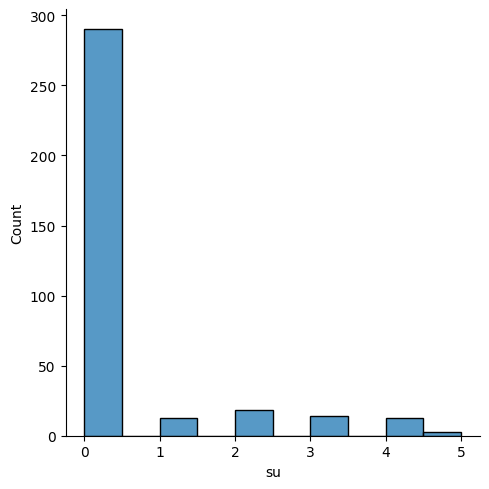

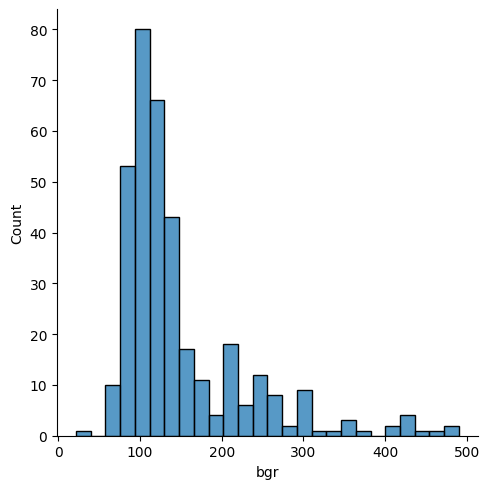

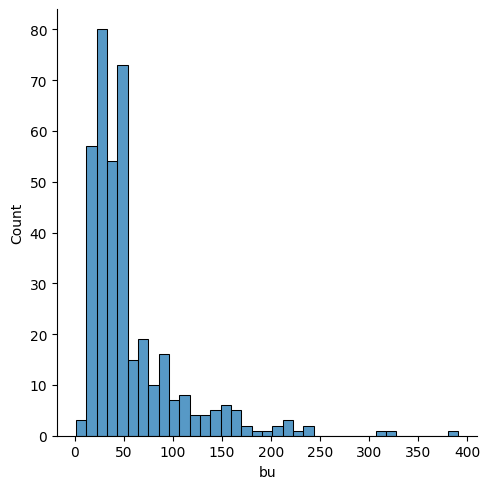

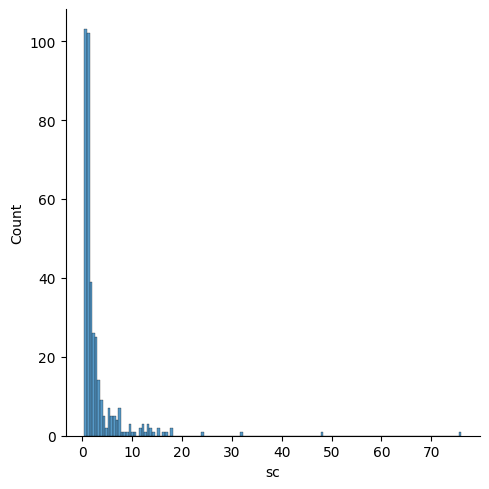

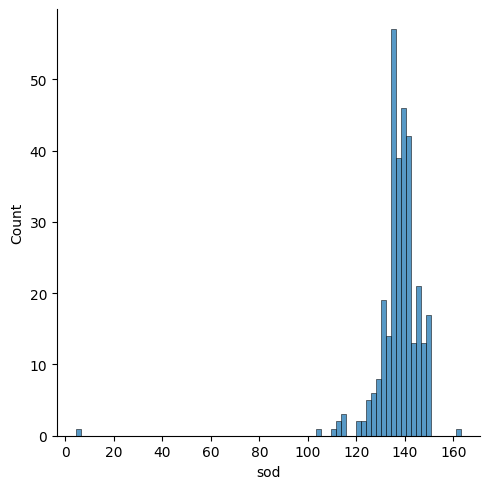

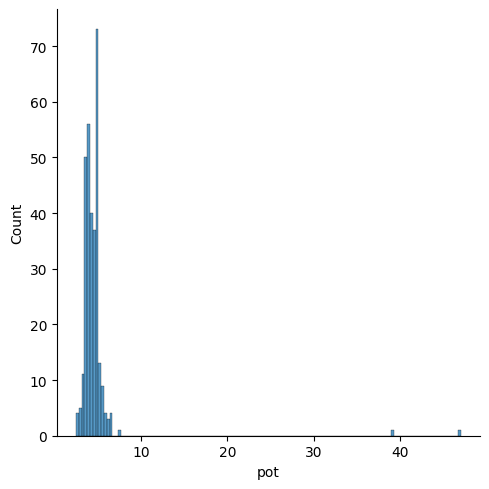

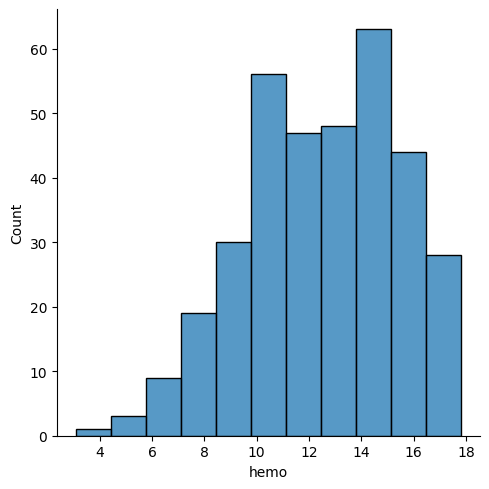

In [29]:
def distplots(col):
    sns.displot(df[col])
    plt.show()

for i in list(df_imputer.select_dtypes(exclude = ['object']).columns)[1:]:
    distplots(i)

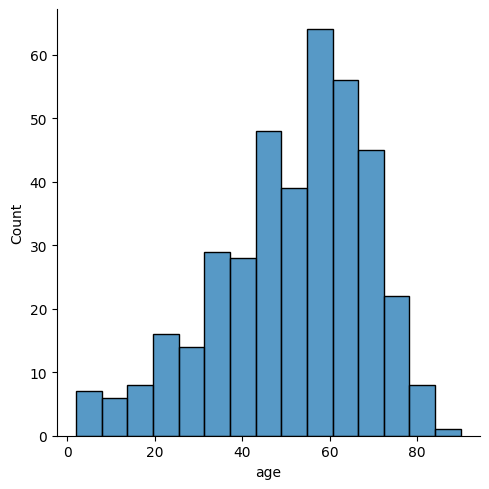

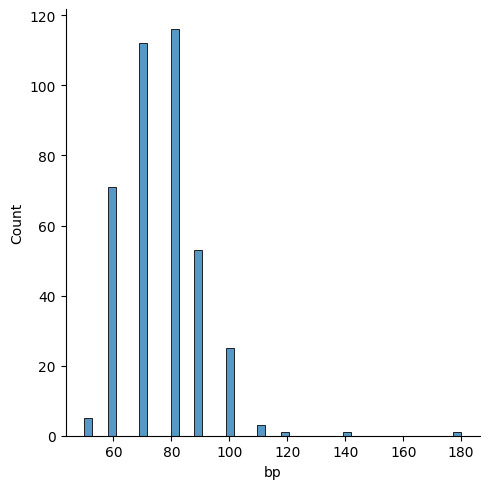

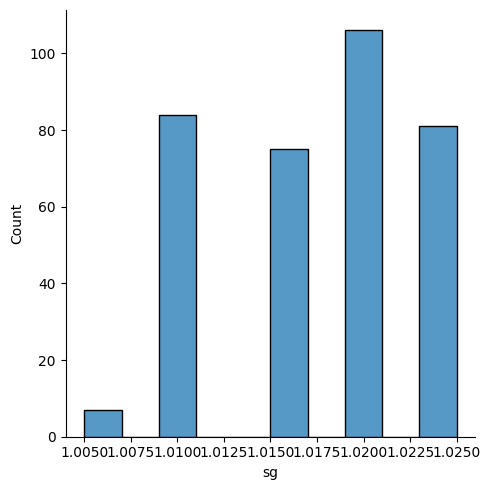

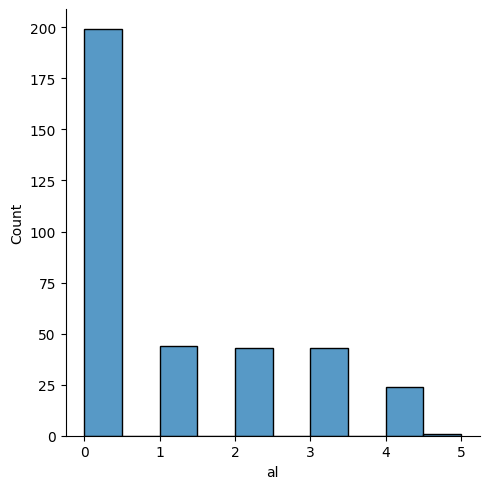

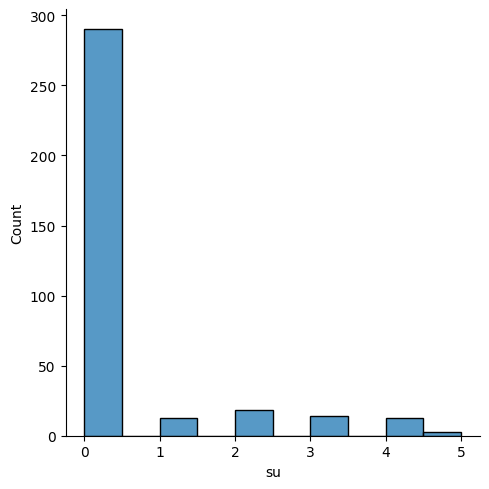

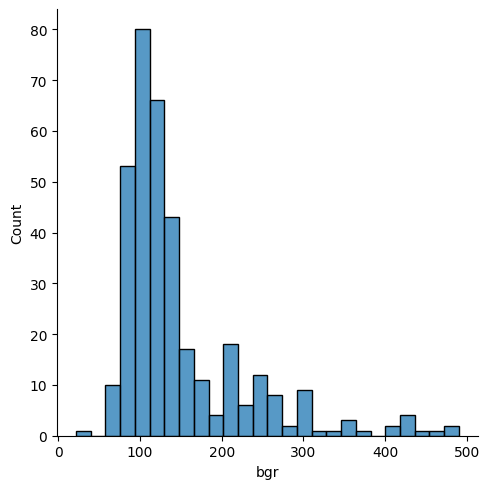

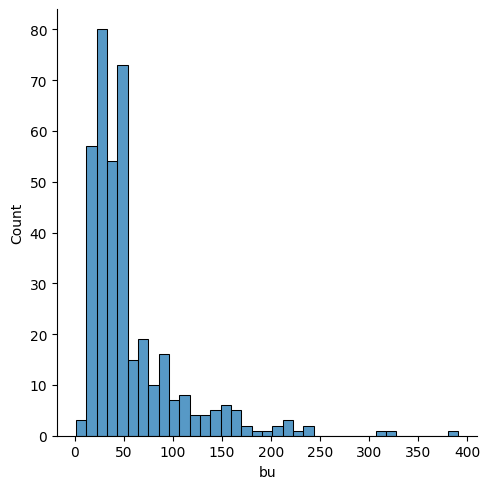

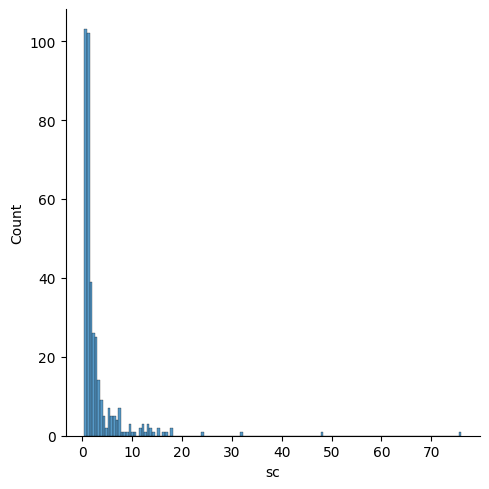

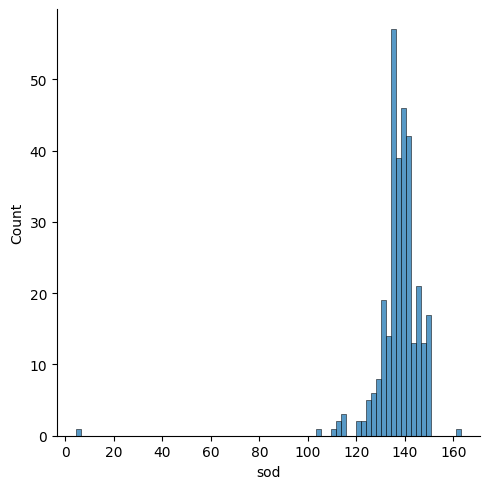

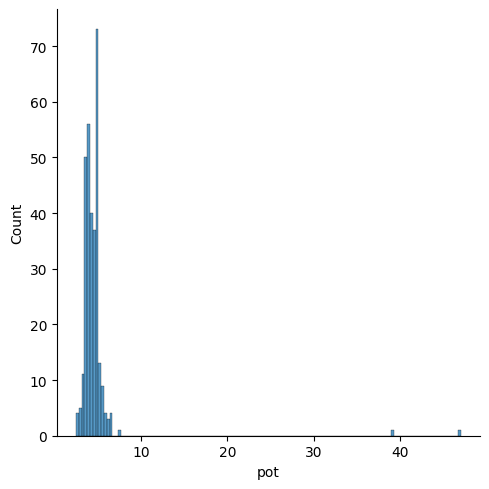

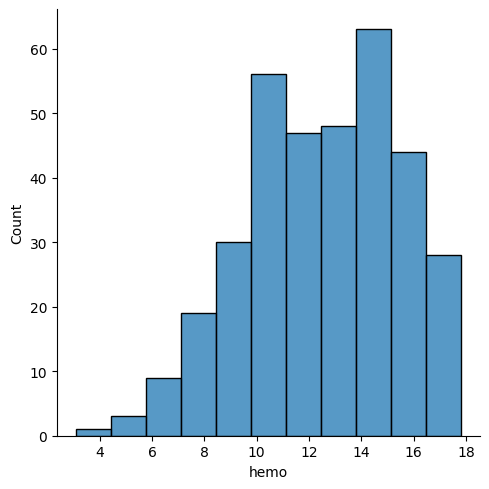

In [30]:
def distplots(col):
    sns.displot(df[col])
    plt.show()

for i in list(df_imputer.select_dtypes(exclude = ['object']).columns)[1:]:
    distplots(i)

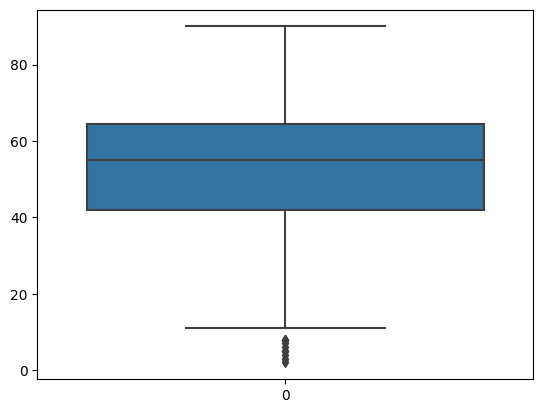

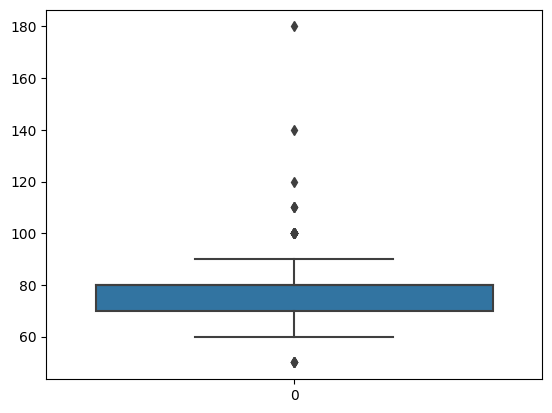

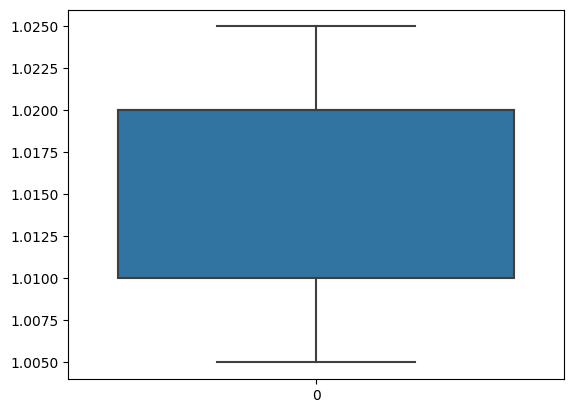

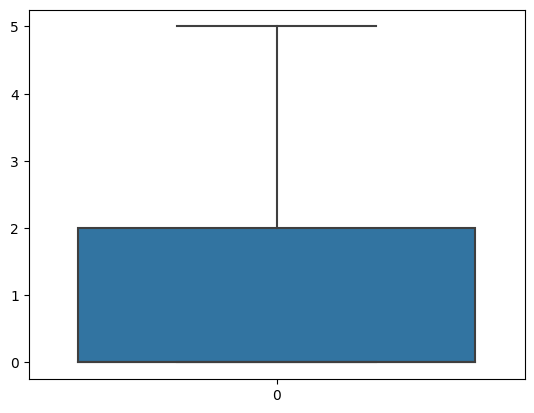

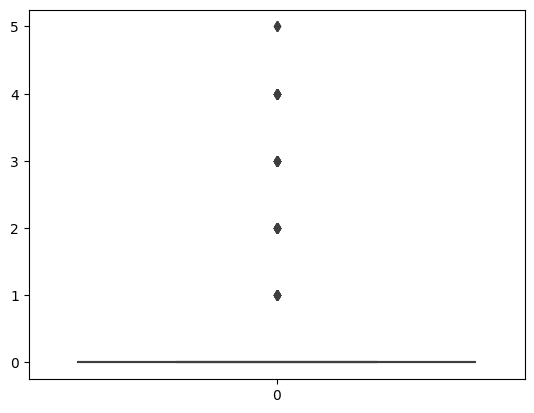

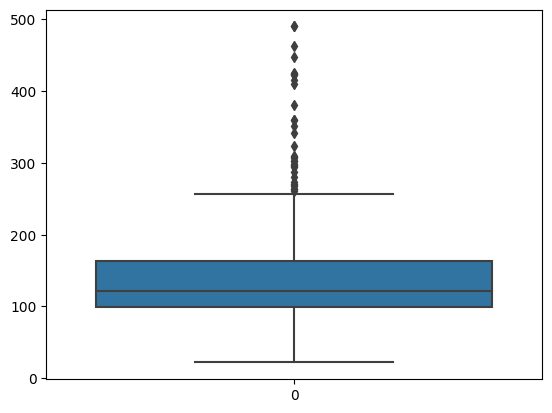

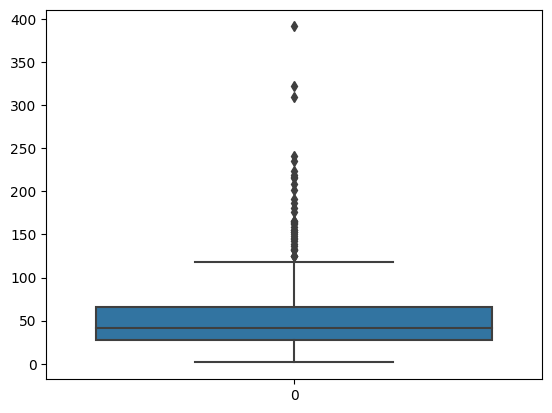

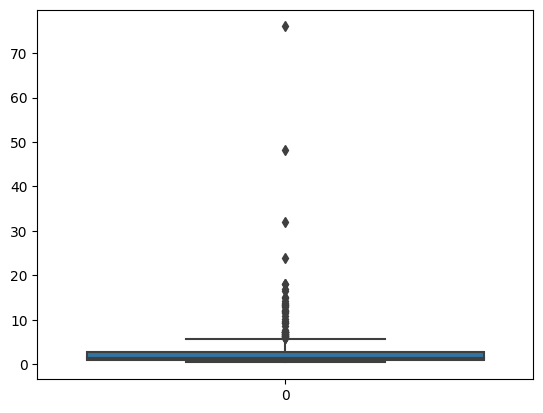

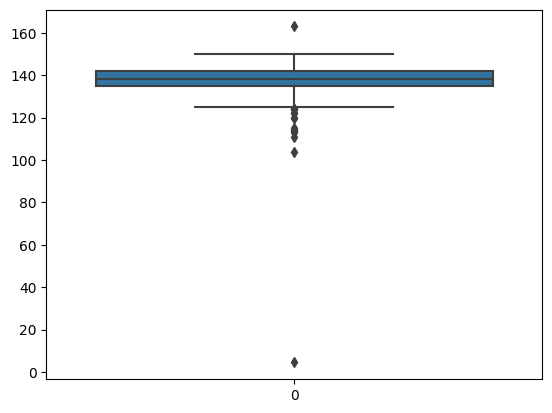

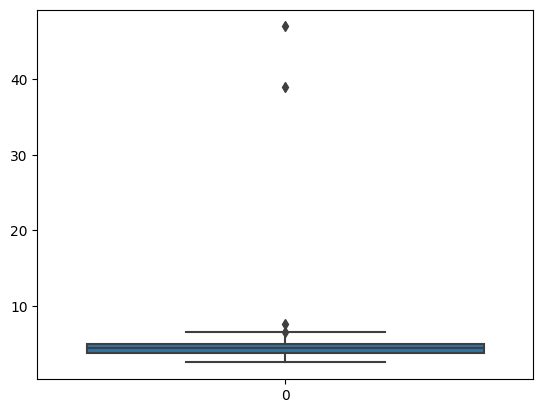

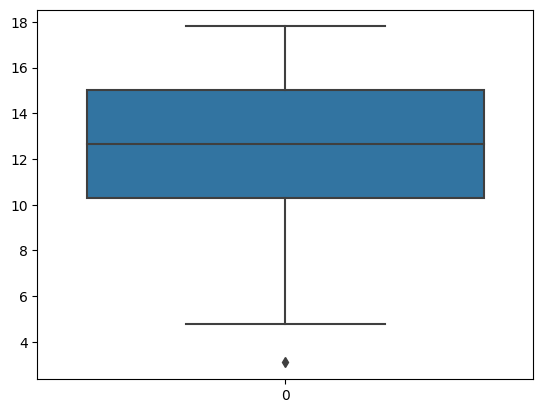

In [31]:
#Outliers Detection & Remove
def boxf(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df_imputer.select_dtypes(exclude = ['object']).columns)[1:]:
    boxf(i)

In [ ]:
df_imputer.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [32]:
from sklearn import preprocessing

In [33]:
encode = df_imputer.apply(preprocessing.LabelEncoder().fit_transform)
encode

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,2,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,1,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,2,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,1,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,1,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,1,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,1,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,1,0,0,0,0,1


In [34]:
encode.to_csv("Final_Pre_Processing_data.csv")

<Axes: >

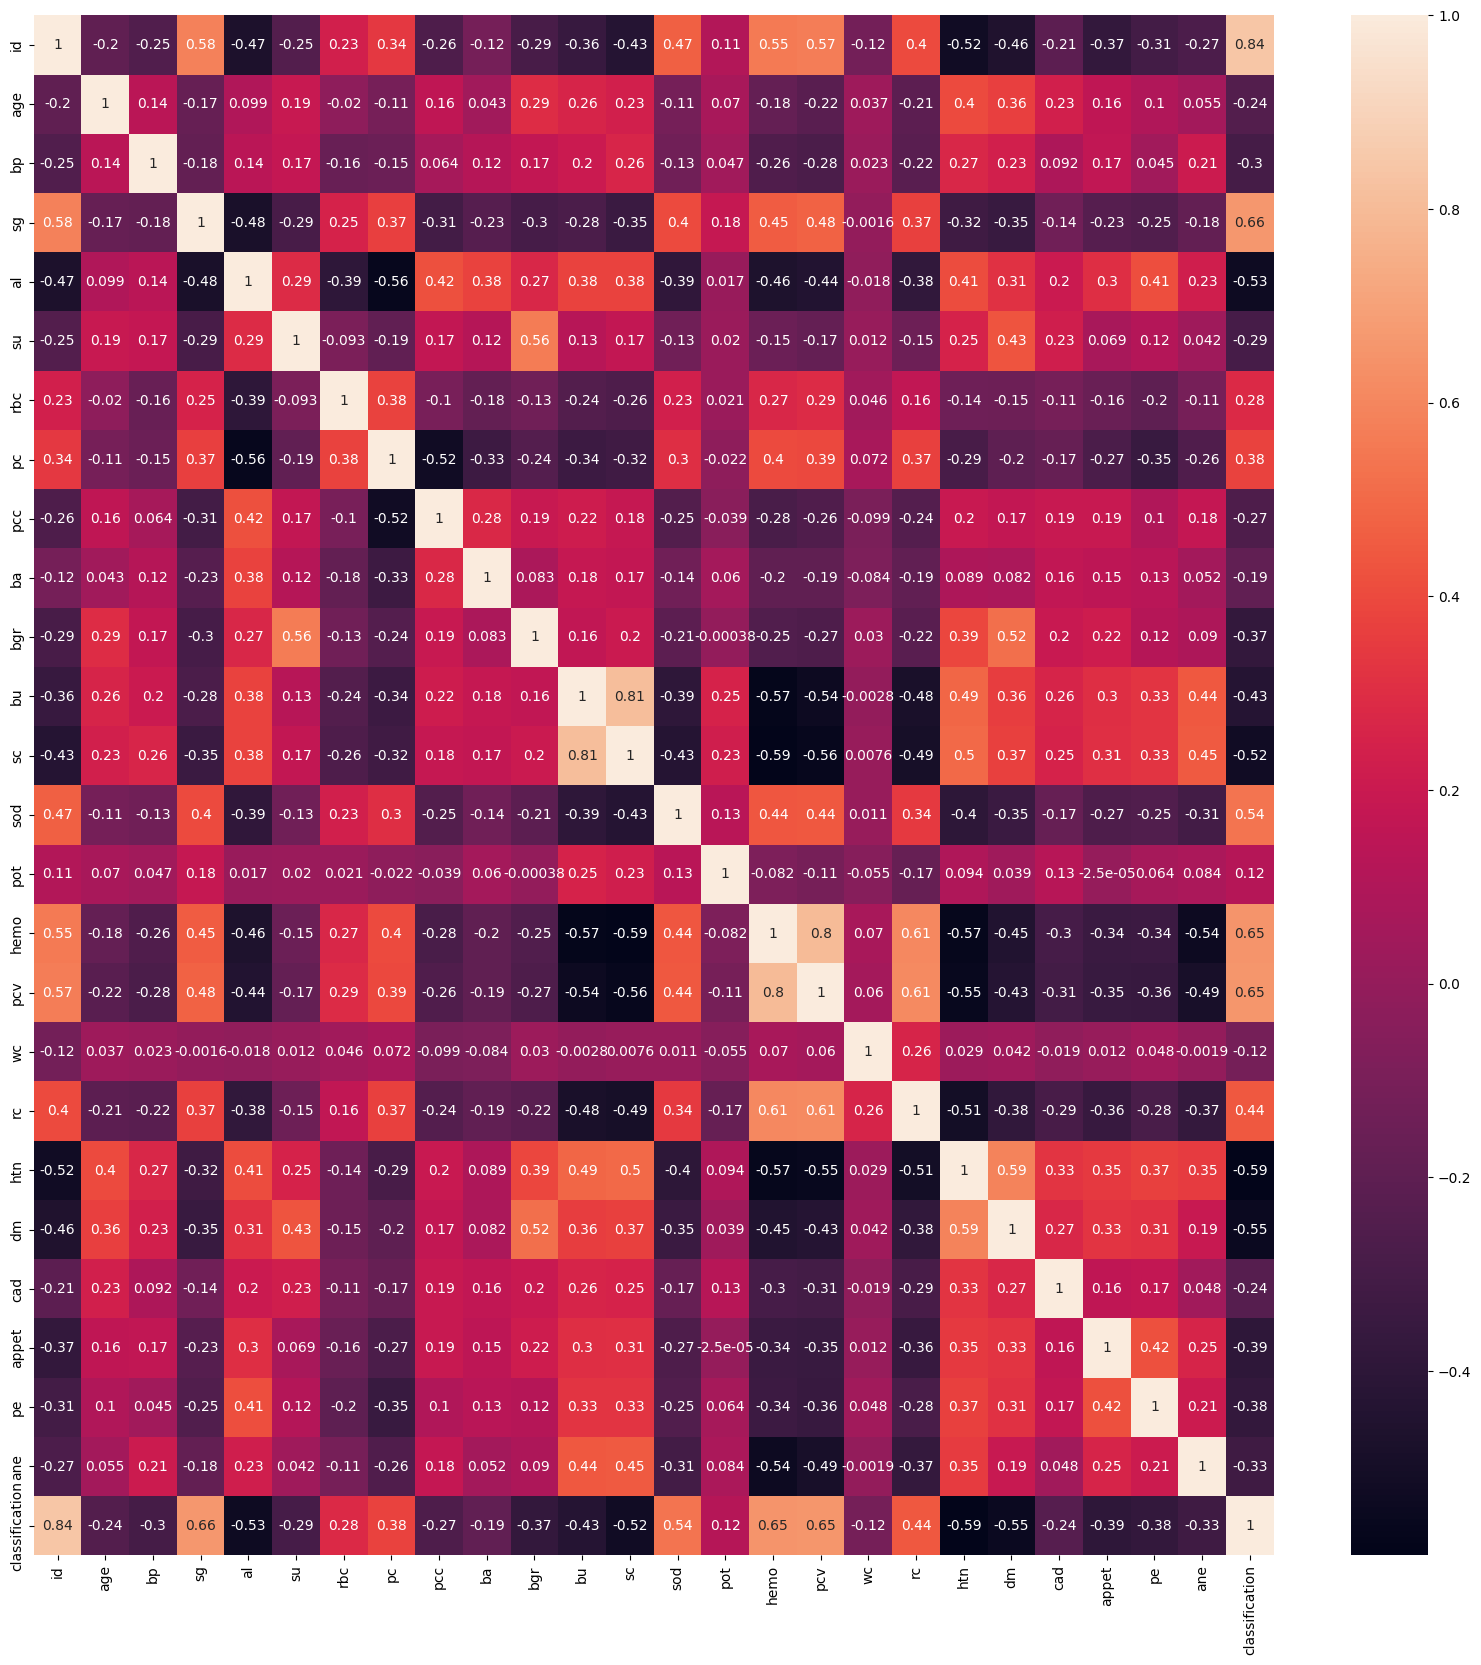

In [35]:
plt.figure(figsize=(20,20))
corr = encode.corr()
sns.heatmap(corr, annot = True)

In [36]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [37]:
x = encode.drop(['id', 'classification'], axis = 1)
y = encode['classification']

In [38]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,3,3,1,0,1,1,0,0,48,...,90,30,69,33,1,2,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,49,24,53,33,0,1,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,32,17,67,33,0,2,0,1,0,1
3,40,2,0,4,0,1,0,1,0,44,...,48,18,59,18,1,1,0,1,1,1
4,43,3,1,2,0,1,1,0,0,33,...,52,21,65,26,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,93,33,59,29,0,1,0,0,0,0
396,34,2,4,0,0,1,1,0,0,3,...,101,40,69,43,0,1,0,0,0,0
397,8,3,3,0,0,1,1,0,0,27,...,94,35,58,35,0,1,0,0,0,0
398,11,1,4,0,0,1,1,0,0,41,...,78,37,64,40,0,1,0,0,0,0


In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import RandomOverSampler
print ('Done')

Done


In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [41]:
print(Counter(y))

Counter({0: 250, 1: 150})


In [42]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(X_ros)
y = y_ros

In [45]:
x

array([[ 0.06666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86666667, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44      , -0.33333333, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.54666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.41333333, -0.55555556,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.17333333, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ]])

In [46]:
df.shape

(400, 26)

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca =PCA(.95)
X_PCA = pca.fit_transform(x)

In [49]:
print(x.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


In [50]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.2, random_state = 7)

In [52]:
x_train

array([[-1.25724011,  0.06376423,  0.12740435, ...,  0.16924519,
        -0.1277179 , -0.04409399],
       [-1.22184702,  0.02023674, -0.01471303, ...,  0.3078626 ,
         0.10062084, -0.14933823],
       [-0.46873075, -0.34699735, -0.16664269, ..., -0.85323937,
         0.22459369,  0.18496551],
       ...,
       [ 1.069435  , -1.59303318, -0.66491795, ..., -0.47849972,
         0.21544437, -0.28307258],
       [ 4.38018067,  0.58781232,  1.20113204, ..., -0.11570702,
         0.02894795, -0.15534586],
       [ 0.68188937, -0.90935584, -0.96362818, ...,  0.2082411 ,
        -0.21945812,  1.31787205]])

In [53]:
x_test

array([[-1.16175182,  0.00300226,  0.08197634, ..., -0.16290996,
         0.19672004, -0.16960832],
       [ 2.08373523, -1.46415354,  1.62759995, ..., -0.23157075,
        -0.25251181, -0.22953812],
       [-1.24639785,  0.19014152, -0.04827601, ...,  0.25071096,
        -0.26690801,  0.15929467],
       ...,
       [ 1.45472716, -0.2978695 , -1.59168205, ...,  0.21847813,
         0.63913976, -0.16358012],
       [-1.20610282,  0.25324388, -0.25172808, ...,  0.42497411,
        -0.23937083, -0.09518411],
       [ 1.81608483, -1.79840072, -0.91549775, ..., -0.3668671 ,
        -0.23024213,  0.1514707 ]])

In [54]:
y_train.shape

(400,)

In [55]:
Y_test.shape

(100,)

In [66]:
y_test

308    1
13     0
414    1
32     0
460    1
      ..
235    0
26     0
168    0
451    1
238    0
Name: classification, Length: 100, dtype: int64

Neural Network

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model
from keras.optimizers import Adam
#from sklearn.model_selection import Kfold

In [57]:
def model():
    clf = Sequential()
    clf.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu'))
    clf.add(Dropout(0.2))
    clf.add(Dense(15,activation = 'relu' ))
    clf.add(Dropout(0.4))
    clf.add(Dense(1, activation = 'sigmoid'))
    clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return clf

In [58]:
model = model()

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, verbose = 1)

Epoch 1/5
13/13 [==============================] - 2s 30ms/step - loss: 0.5518 - accuracy: 0.7000 - val_loss: 0.4902 - val_accuracy: 0.9600
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.5020 - accuracy: 0.7875 - val_loss: 0.4493 - val_accuracy: 0.9600
Epoch 3/5
13/13 [==============================] - 0s 7ms/step - loss: 0.4844 - accuracy: 0.8125 - val_loss: 0.4109 - val_accuracy: 0.9600
Epoch 4/5
13/13 [==============================] - 0s 8ms/step - loss: 0.4463 - accuracy: 0.8325 - val_loss: 0.3751 - val_accuracy: 0.9600
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.4158 - accuracy: 0.8600 - val_loss: 0.3415 - val_accuracy: 0.9600


In [ ]:
input * Wegith + bais

In [69]:
x_train.shape[1]

18

In [70]:
x_train.shape[1]*15 # Dense X * wegith

270

In [71]:
(x_train.shape[1] + 1)*15 # X*w+bias

285

In [72]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, confusion_matrix

In [73]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, confusion_matrix


# function to plot the roc_curve
def plot_auc(t_y, p_y):
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')


# function to plot the history
def plot_history(history):
    f = plt.figure()
    f.set_figwidth(15)

    f.add_subplot(1, 2, 1)
    plt.plot(history.history['val_loss'], label='val loss')
    plt.plot(history.history['loss'], label='train loss')
    plt.legend()
    plt.title("Modell Loss")

    f.add_subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.legend()
    plt.title("Modell Accuracy")

    plt.show()

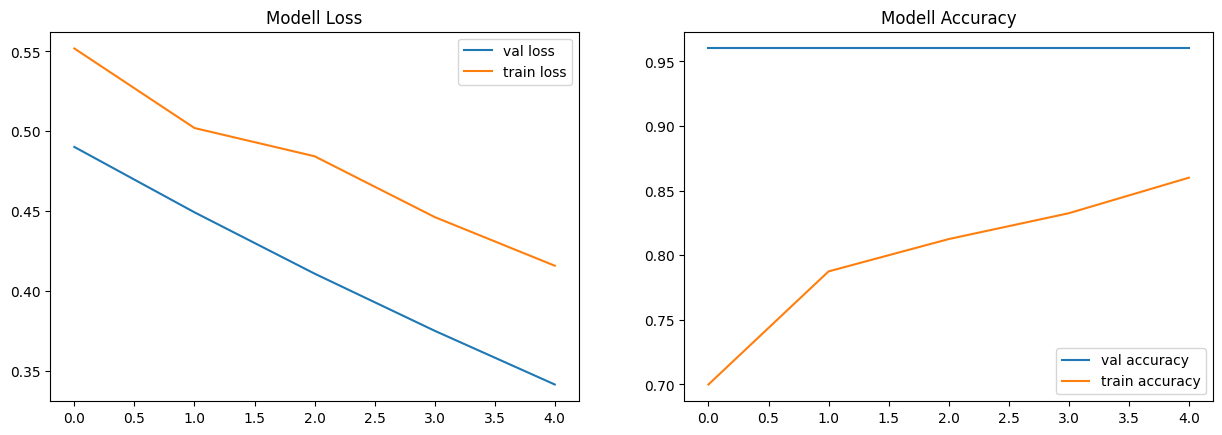

In [74]:
hist = plot_history(history)

4/4 [==============================] - 0s 4ms/step


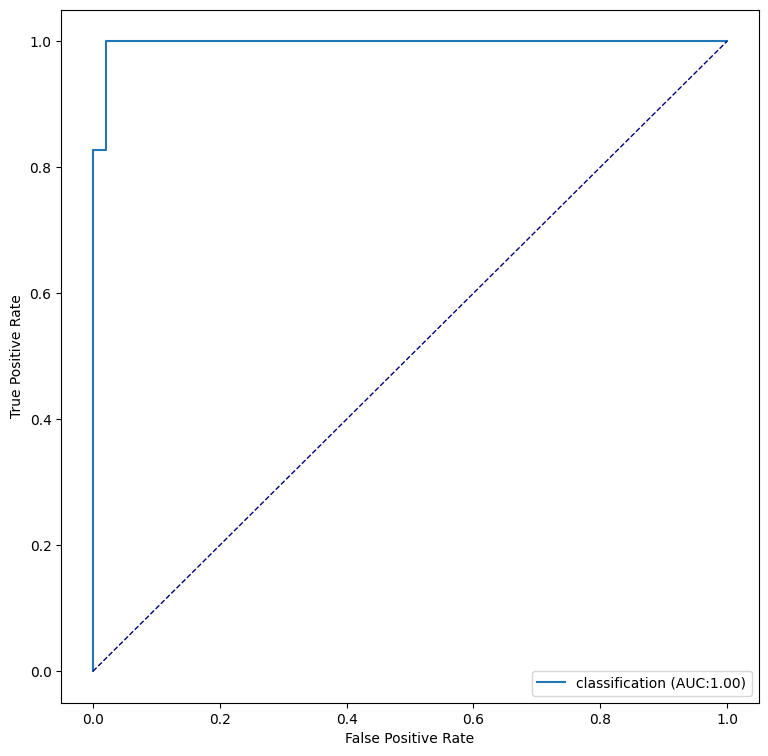

In [75]:
plot_auc(y_test, model.predict(x_test, verbose = True))

4/4 [==============================] - 0s 4ms/step


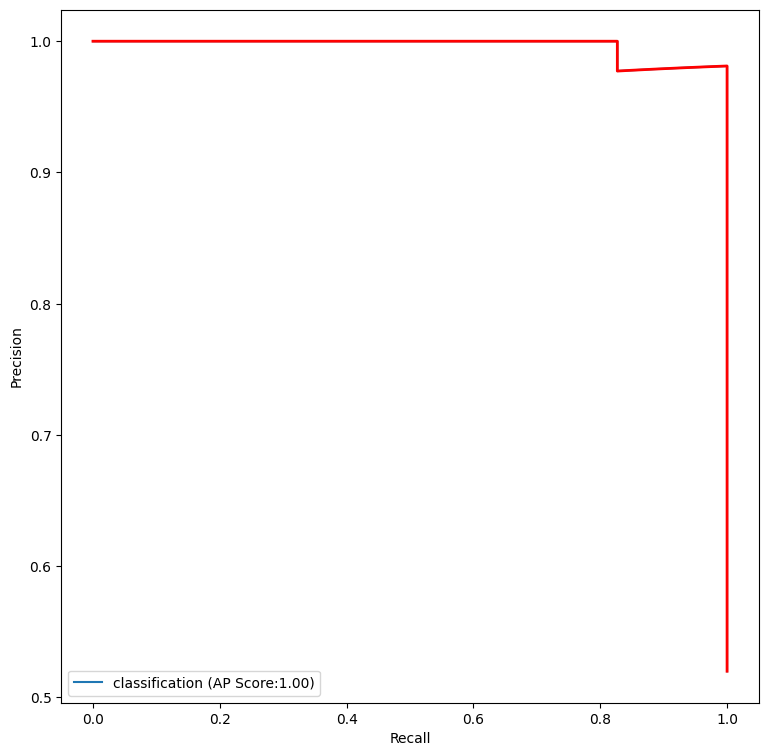

In [76]:
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

In [77]:
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose = True))
f1score = [calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1score)
threshold = thresholds[idx]
print('********************************************************************************************************')
print('Precision: '+ str(precision[idx]))
print('Recall: '+ str(recall[idx]))
print('Threshold: '+ str(thresholds[idx]))
print('F1 Score: ' + str(f1score[idx]))

4/4 [==============================] - 0s 2ms/step
********************************************************************************************************
Precision: 0.9811320754716981
Recall: 1.0
Threshold: 0.61799335
F1 Score: 0.9904761904761905
